## Exploratory Data Analysis

- it is the process of cleaning and reviewing the data to derive insights such as descriptive statistics and correlations and generate hypothesis for experiments


In [ ]:
import pandas as pd
books = pd.read_csv("books.csv")

# .info() summarizes the total number of missing values in each column, the data type of each column and the memory usage
books.info()

# A CLOSER LOOK AT CATEGORICAL COLUMNS
books.value_counts("genre")

# A CLOSER LOOK AT NUMERICAL COLUMNS
# calling .describe on a dataframe computes, count, mean, std, min, 25th. 50th and 75th quantile and max of the columns
books.describe()

# VISUALIZING NUMERICAL DATA
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data = books, x = 'rating', binwidth = 0.1) 
plt.show()

                    

#### Data Validation

- We want to understand if the data types and ranges are as expected before we progress too far in our analysis

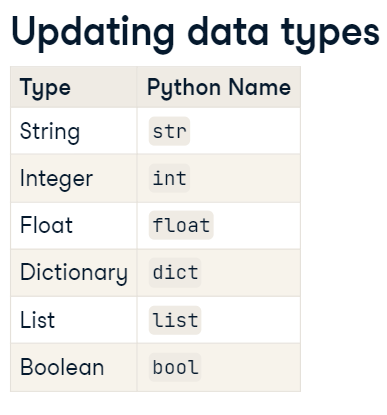

- Categorical data can be validated by comparing all the values of a column to a list of expected values in the column
- Numerical data can be easily analysed by viewing a detailed description of the data by using a boxplot

In [ ]:
# Return only the datatypes of a dataframe
books.dtypes

# UPDATING DATA TYPES
books['year'] = books['year'].astype(int)
books.dtypes

# VALIDATING CATEGORICAL DATA
# Categorical data can be validated by comparing all the values of a column to a list of expected values in the column
books['genre'].isin(['Fiction', 'Non Fiction'])
# This can be used in combination with subsetting to filter values
books[books['genre'].isin(['Fiction', 'Non Fiction'])].head()

# VALIDATING NUMERICAL DATA
# Numerical data can be selected an viewed using
books.select_dtypes("number")
# Range of years can be found using the .min() and the .max() function

### Data Summarization:

- .groupby() can be used to group data and use aggregating functions like mean, sum, count, min, max, var, std etc
- .agg() functions allows to apply aggregate multiple functions

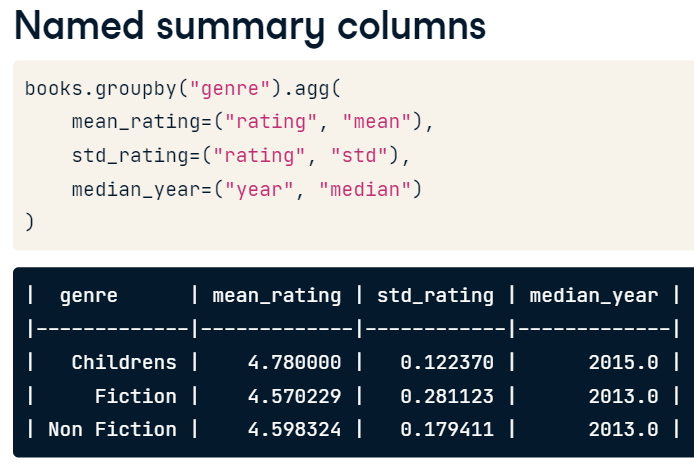

In [ ]:
# DATA SUMARIZATION

# Group by
books.groupby('genre').mean()
# Aggregating multiple functions using .agg function
books. agg(['mean', 'std'])
# Dictionaries are used to apply different aggregating fucntions to different columns
books.agg({"rating" : ["mean", "std"], "year": ["median"]})
# Named Summary columns
# Syntax: df.groupby('column').agg(new_col_name1 = ("col_name", "agg_function"), new_col_name2 = ("col_name", "agg_function"), new_col_name3 = ("col_name", "agg_function"))
books.groupby('genre').agg(mean_rating = ("rating", "mean"), std_rating = ("rating", "std"), median_year = ("year", "median"))



### Addressing Missing Data:

- Missing data is a problem because certain groups can be disproportionately represented eg: lacking data of older students' heights
- This can result in drawing incorrect conclusions


In [ ]:
# CHECKING FOR MISSING VALUES:
print(dataframe.isna().sum())

#### STRATEGIES FOR ADDRESSING MISSING DATA:

1) Drop Missing Values:
- Remove observations if they amount to 5% or less of the total values

2) Impute with Summary Statistics:
- Impute with Mean, Median or Mode

3) Impute with Sub-Groups:

In [ ]:
# DROPPING MISSING VALUES:
threshold = len(salaries) * 0.05
cols_to_drop = salaries.columns[salaries.isna() <= threshold] 
salaries.dropna(subset = cols_to_drop, inplace = True)

# IMPUTING A SUMMARY STATISTIC:
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
print(cols_with_missing_values)
for col in cols_with_missing_values[:-1]:
    salaries[col].fillna(salaries[col].mode()[0]) 

# IMPUTING BY SUBGROUP
salaries_dict = salaries.groupby("Experience")["Salary USD"].median().todict()
salaries['Salary USD'] = salaries['Salary USD'].fillna(salaries['Experience'].map(salaries_dict))

### Converting and Analyzing Categorical Data

- We can search a column for a specific string or multiple strings using the following command:
- Syntax: Dataframe['Column_Name'].str.contains("String_to_be_searched")
- eg: salaries['Designation'].str.contains("Scientist")

In [ ]:
# Previewing columns with categorical data
print(salaries.select_dtypes("object").head())

# Examining frequency of values in the 'Designation' column
salaries['Designation'].value_counts()
salaries['Deisgnation'].nunique()   # Counts the total unique Designations in the column

# Extracting values from columns:
salaries['Designation'].str.contains("Scientist")
# Finding multiple phrases in strings
salaries['Designation'].str.contains("Machine Learning|AI") # Avoid Spaces before or after | as it is also counted as a character
# Finding Strings that start with "Data"
salaries['Designation'].str.contains("^Data") 

# FINAL:

# This list determines the values of the new column in the dataframe
job_categories = ['Data Science', 'Data Analytics', 'Data Engineering', 'Machine Learning', 'Manegerial', 'Consultant']
# Variables containing our filters
data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learnin|ML|Big Data\AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant = "Consultant|Freelance"
# List with all the conditions
conditions =  [(salaries['Designation'].str.contains(data_science)),
            (salaries['Designation'].str.contains(data_analyst)),
            (salaries['Designation'].str.contains(data_engineer)),
            (salaries['Designation'].str.contains(ml_engineer)),
            (salaries['Designation'].str.contains(manager)),
            (salaries['Designation'].str.contains(consultant))]
# Create Job Category Column
salaries["Job_Category"] = np.select(conditions, job_categories, default = "Other") # Default sets the default value for the column


### Working with Numeric Data

CONVERTING STRINGS TO NUMBERS:

1) Remove Comma Values
2) Convert column to float data type
3) Create a new column

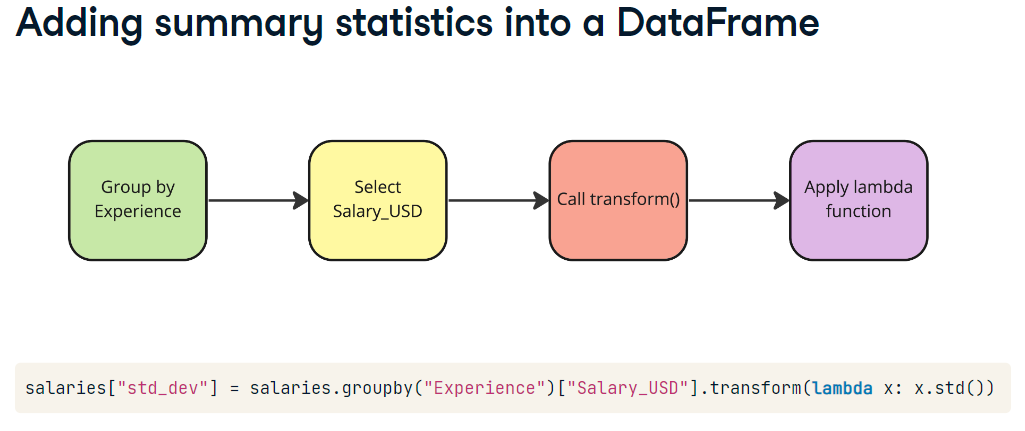


In [ ]:
# 1) Remove Comma Values
# Syntax = pd.Series.str.replace("characters to remove", "characters to replace them with")
salaries['Salary_In_Rupees'] = salaries["Salary_In_Rupees"].str.replace(",", "")

# 2) Convert column to float data type
salaries['Salary_In_Rupees'] = salaries["Salary_In_Rupees"].astype(float)

# 3) Create a new column
salaries['Salary_USD'] = salaries["Salary_In_Rupees"] * 0.012

# ADDING SUMMARY STATISTICS INTO A DATAFRAME 
salaries["std_dev"] = salaries.groupby("Experience")["Salary_USD"].transform(lambda x: x.std())


### Handling Outliers

- An outlier is an observation that is far away from other data points

Steps:
1) using .descibe method. Look at the max and the mean and the median. If it is too extreme, there must be outliers

2) Find the InterQuartile Range(IQR):
- IQR = 75th percentile = 25th percentile

3) Calculate Thresholds
- Upper Outliers > 75th percentile + (1.5 * IQR)
- Lower Outliers < 25th percentile - (1.5 * IQR)

### Why look for Outliers?

- May not accurately represent the data
- Can change the standard deviation and the mean
- Statistical tests and ML models need normally distributed data

### What to do about Outliers?
Questions to ask:
1) Why do these outliers exist?
2) Is the data accurate?
- could there be an error in data collection?


In [ ]:
# 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
# 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)
# IQR
salaries_iqr = seventy_fifth = twenty_fifth

# Upper Threshold
Upper = seventy_fifth + (1.5 * salaries_iqr)
# Lower Threshold
Lower = twenty_fifth - (1.5 * salaries_iqr)

# Subsetting Data
salaries[salaries["Salary_USD"]<Lower | salaries["Salary_USD"]>Upper]

# Removing Outliers
no_outliers = salaries[(salaries['Salary_USD'] > Lower) & (salaries['Salary_USD'] < Upper)]


### Patterns over time

- When data includes date or time values, we might want to examine if there are patterns over time
- Typically date and time data is interpreted as strings, we need to convert it to a datetime object

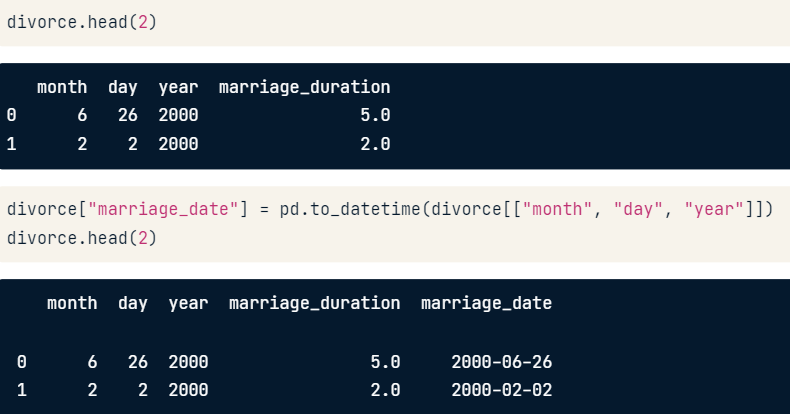

In [ ]:
# DATASET
divorce = pd.read_csv('divorce.csv')

# Converting strings to datetime object
divorce = pd.read_csv('divorce.csv', parse_dates = ["marraige_date"])

# Converting strings to datetime object after importing data
divorce['marraige_date'] = pd.to_datetime(divorce['marraige_date'])

# Converting Data from different columns to a date
divorce['marraige_date'] = pd.to_datetime(divorce[["month", "day", "year"]])

# EXTRACTING PARTS OF A DATE
# Extracting month
divorce['marraige_date'] = divorce["marriage_date"].dt.month
# Extracting day
divorce['marraige_date'] = divorce["marriage_date"].dt.day
# Extracting year
divorce['marraige_date'] = divorce["marriage_date"].dt.year

### Correlation

- Correlation describes the direction and strength of the relationship between two variables
- A negative correlation coefficient indicates an inverse relation between the variables
- A 0 correlation variable indicates a weak relationship
- Correlation variable closer to 1 indicates a strong relationship
- .corr() method calculates the pearsons correlation coefficient
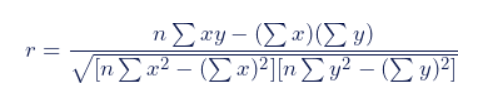

### Correlation in context

- In the divorce dataset, marraiges that ended between 2000 and 2015 are present
- So, marraiges that started in earlier years will by definition have a longer duration than those that started in later years.
- Pearson Coeffient only describes a linear relationship between data. Data might have a non linear correlation close to 0.
- This is why it is important to complement our correlation calculations with scatterplots
 
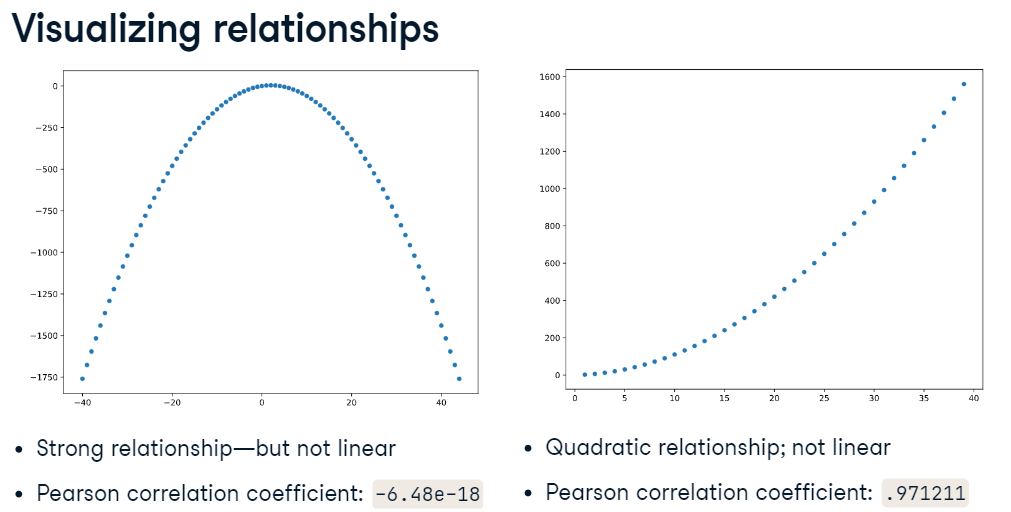

In [ ]:
# Determining Correlation
divorce.corr()

# Correlation Heatmaps
sns.heatmap(divorce.corr(), annot = True)   # annot = True labels the correlation coefficient inside each cell
plt.show()

# Correlation in Context
sns.scatterplot(data = divorce, x = "income_man", y = "income_woman")
sns.pairplot(data = divorce)    # pairplot plots a scatterplot between all numerical variables in a dataframe
# Refinig Pairplot
sns.pairplot(data = divorce, vars = ["income_man", "income_woman", "marriage_duration"])
plt.show()


### Factor(Categorical Variables) Relationships and Distributions

- categorical variables are harder to summarize numerically. So, we rely on visualization to explore their relationships

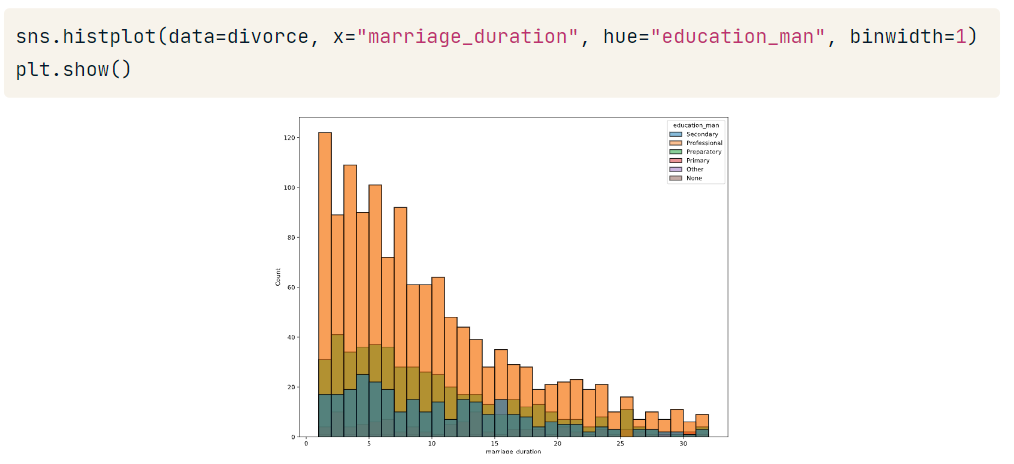

- histograms stack data on top of one another which may make it difficult to analyze the data
- This problem is addressed by the Kernel Density Estimate(KDE) plots in seaborn

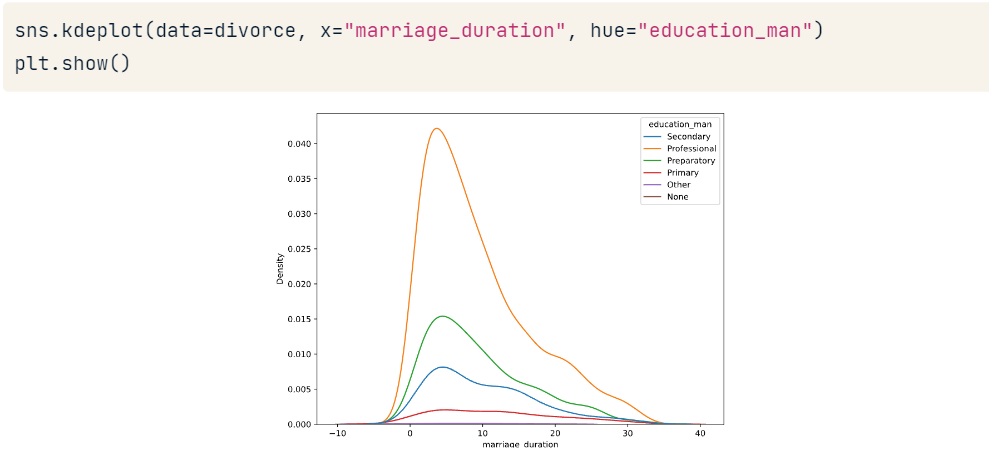

- It is important to set good smoothing parameters in a KDE plot
- eg: in the above plot, the graph suggests that there are marraiges with duration less than 0 which is impossible. In this case the cut parameter is used.

In [ ]:
# Relationships between Categorical Variables 
divorce["education_man"].value_counts()


# Exploring the relationship between Marraige Duration and Education Level 
sns.histplot(data = divorce, x = "marriage_duration",hue = "education_man", binwidth = 1)
# Kernel Density Estimate (KDE) plots:
sns.kdeplot(data = divorce, x = "marriage_duration", hue = "education_man")
# SETTING GOOD SMOOTHING PARAMETERS
# cut parameter
sns.kdeplot(data = divorce, x = "marriage_duration", hue = "education_man", cut = 0)
# cummulative distributions
sns.kdeplot(data = divorce, x = "marriage_duration", hue = "education_man", cut = 0, cumulative=True)
# Scatterplot with categorical variables
sns.scatterplot(data = divorce, x = 'woman_age_marriage', y = "man_age_marriage", hue = "education_man") 
plt.show()

### Considerations for categorical data

- Data must be representative of the population
- Class imbalance is the scenario where one class occurs more frequently than the others
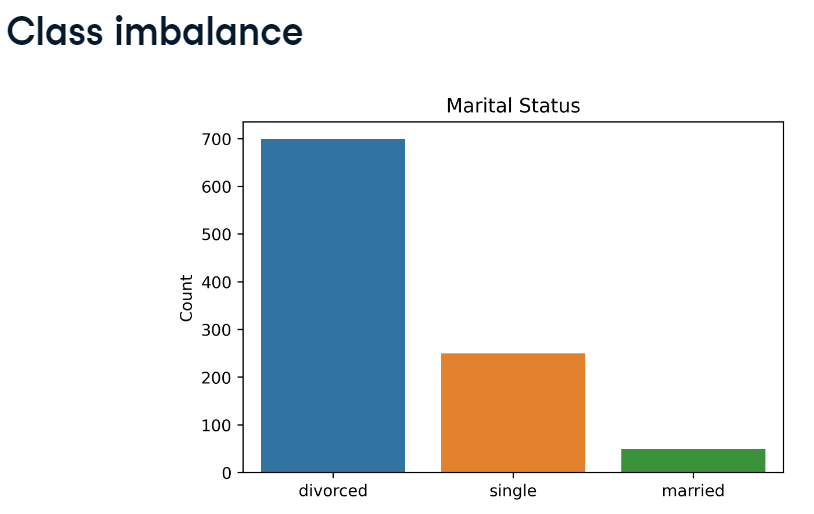

- the normalize parameter of the .value_counts method returns the relative frequency of the different entries in a column

#### Cross Tabulation

- it allows us to examine the frequency of combinations of classes

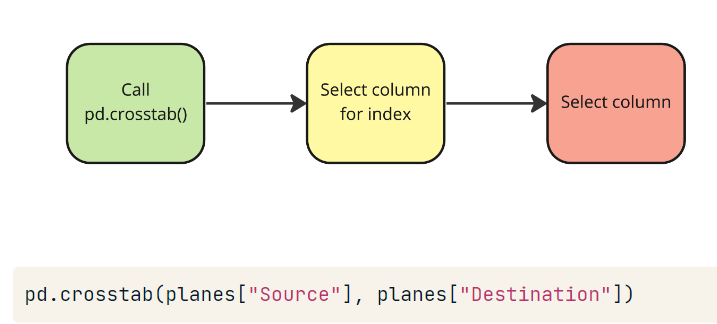

#### Extending Cross Tabulation



In [ ]:
# RELATIVE FREQUENCY
planes['Destination'].value_counts(normalize = True)

# CROSS TABULATION
pd.crosstab(planes["Source"], planes["Destination"])

# EXTENDING CROSS TABULATION
pd.crosstab(planes["Source"], planes["Destination"], values = planes["Price"], aggfunc = "median")

### Generating New Features

- Start by checking correlation using a heat map

### Descriptive Statistics
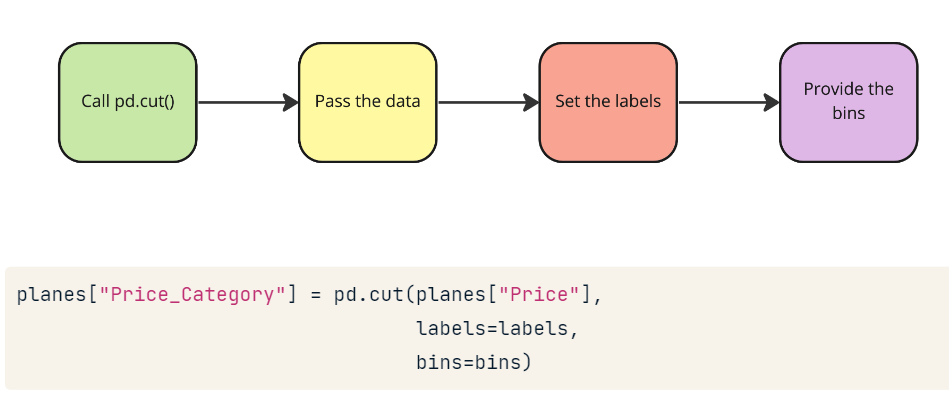

In [ ]:
# DESCRIPTIVE STATISTICS

twenty_fifth = planes["Price"].quantile(0.25)
median = planes["Price"].quantile(0.5)
seventy_fifth = planes["Price"].quantile(0.75)
maximum = planes['Price'].max()
# Creating Labels and Bins
labels = ["Economy", "Premium Economy", "Business Class", "First Class"]
bins = [0, twenty_fifth, median, seventy_fifth, maximum]
planes["Price Category"] = pd.cut(planes["Price"], labels = labels, bins = bins)
sns.countplot(data = planes, x = "Airline", hue = "Price_Categoty")
plt.show()

### Generating Hypothesis

1) Spurrious Correlation:
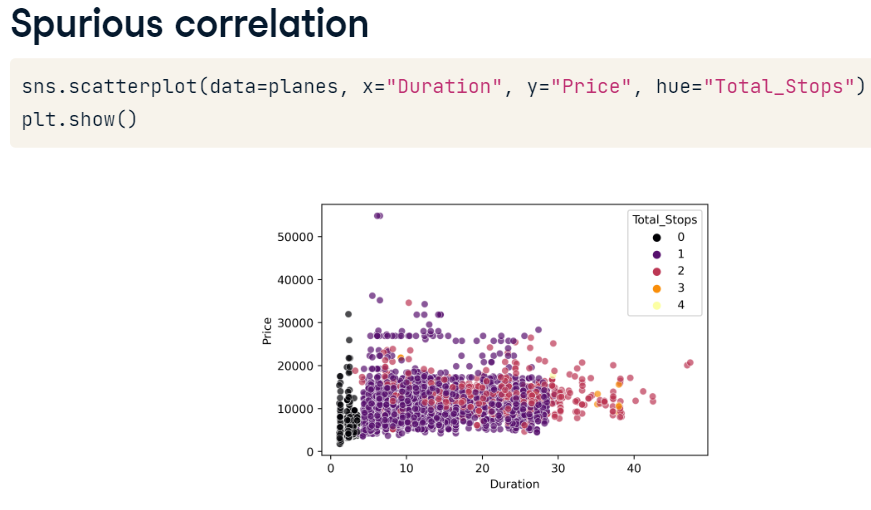

- Hypothesis testing is used to make conculsions regarding relationships, differences and patterns in our data

STEPS FOR HYPOTHESIS TESTING:
- Hypothesis testing requires, prior to data collection:

1) Generating a Hypothesis or Question
2) A descision on what statistical test to use to conculde if the hypothesis was true or false

### Data Snooping:

- The act of excessive exploratory analysis, generation of multiple hypothesis and the execution of multiple statistical methods is known as data snopping or pea hacking

### Deisgning our Experiment:
1) choosing a sample
2) calculating how many data points we need
3) deciding what statistical test we need to run

